In Seaborn, the <b>appearance of grids in plots</b>is controlled by the <b>sns.set(style="whitegrid")</b> line.
This line sets the default style for Seaborn plots to have a white background with grid lines. If you prefer not to have grid lines in your plots, you can change the style to another option or remove the line altogether.

Here are a few options for the style parameter:

<b>whitegrid (default):</b> White background with grid lines.

<b>darkgrid:</b> Dark background with grid lines.

<b>white:</b> White background without grid lines.

<b>dark: </b>Dark background without grid lines.

<b>ticks:</b> White background with ticks on the axes.

In [1]:
import pandas as pd,numpy as np ,sklearn,matplotlib.pyplot as plt,seaborn as sns

In [2]:
data=sns.load_dataset('titanic')

In [3]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## 1. Select ['age', 'fare', 'embarked_town', 'gender', 'pclass', 'survived'] cols from titanic dataset from seaborn

In [4]:
selected_columns = ['survived','pclass','sex','age','fare','embark_town']
data1 = data[selected_columns]
data1

,survived,pclass,sex,age,fare,embark_town
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton
...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,Southampton
887,1,1,female,19.0,30.0000,Southampton
888,0,3,female,NaN,23.4500,Southampton
889,1,1,male,26.0,30.0000,Cherbourg



## 2. Identify and handle outliers in fare with appropriate technique

In [5]:
fare_column=data1['fare']
fare_column

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64

In [6]:
# Calculate quartiles and IQR for the 'fare' column
Q1 = data1['fare'].quantile(0.25)
Q3 = data1['fare'].quantile(0.75)
IQR = Q3 - Q1

# Set the multiplier (adjust as needed)
k = 1.5

# Calculate lower and upper whiskers for the 'fare' column
lower_whisker = max(data1['fare'].min(), Q1 - k * IQR)
upper_whisker = min(data1['fare'].max(), Q3 + k * IQR)

# Display the results
print(f"Lower Whisker for 'fare': {lower_whisker}")
print(f"Upper Whisker for 'fare': {upper_whisker}")

Lower Whisker for 'fare': 0.0
Upper Whisker for 'fare': 65.6344


In [7]:
outliers_lower_whisker = data1[(fare_column < lower_whisker)]
outliers_lower_whisker

,survived,pclass,sex,age,fare,embark_town


In [8]:
outliers_upper_whisker = data1[(fare_column > upper_whisker)]
outliers_upper_whisker

,survived,pclass,sex,age,fare,embark_town
1,1,1,female,38.0,71.2833,Cherbourg
27,0,1,male,19.0,263.0000,Southampton
31,1,1,female,NaN,146.5208,Cherbourg
34,0,1,male,28.0,82.1708,Cherbourg
52,1,1,female,49.0,76.7292,Cherbourg
...,...,...,...,...,...,...
846,0,3,male,NaN,69.5500,Southampton
849,1,1,female,NaN,89.1042,Cherbourg
856,1,1,female,45.0,164.8667,Southampton
863,0,3,female,NaN,69.5500,Southampton


In [9]:
outliers_upper_whisker.groupby('pclass').size()

pclass
1    104
2      5
3      7
dtype: int64

C:\Users\admin\AppData\Local\Temp\ipykernel_12972\1206051740.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.loc[:,'fare_clipped'] = data1['fare'].clip(lower=lower_threshold, upper=upper_threshold)


<Axes: xlabel='fare_clipped'>

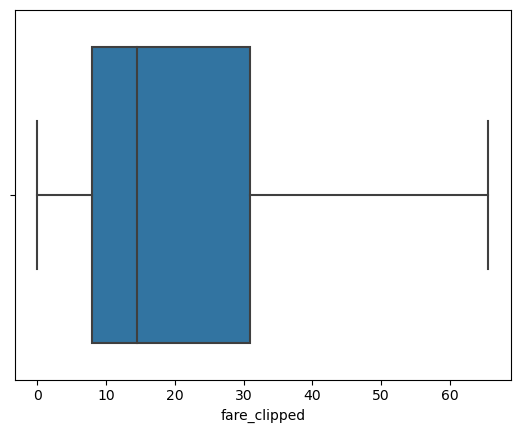

In [10]:
lower_threshold = 0
upper_threshold = 65.6344
data1.loc[:,'fare_clipped'] = data1['fare'].clip(lower=lower_threshold, upper=upper_threshold)
sns.boxplot(x='fare_clipped', data=data1)

## Handling missing values in embark_town Column

<Axes: xlabel='pclass', ylabel='count'>

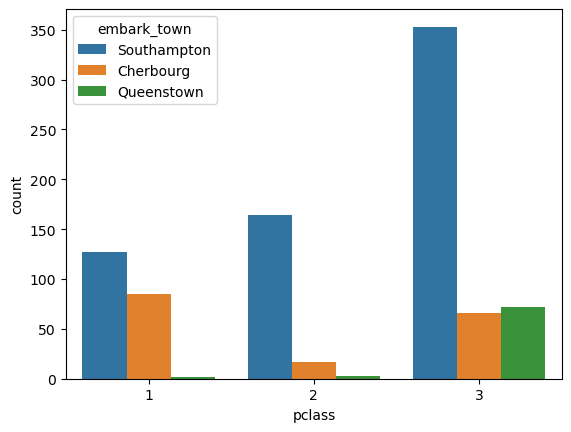

In [11]:
sns.countplot(data=data,x='pclass',hue='embark_town')

In [12]:
Df=data1.copy()
Df['embark_town'].fillna('southampton',inplace=True)

In [13]:
# checking the null values in embark_town
Df.isna().sum()

survived          0
pclass            0
sex               0
age             177
fare              0
embark_town       0
fare_clipped      0
dtype: int64

<Axes: xlabel='pclass', ylabel='count'>

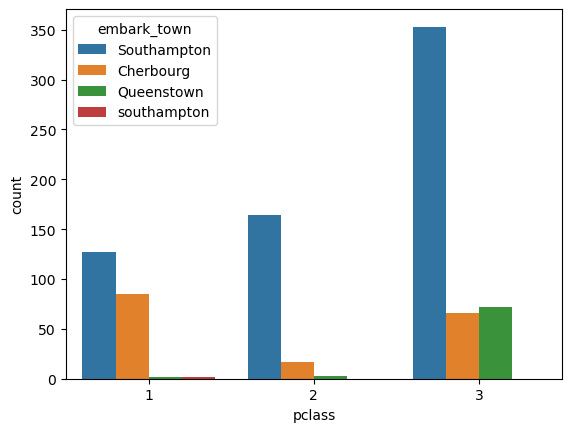

In [14]:
sns.countplot(data=Df,x='pclass',hue='embark_town')

## 3.Handle Missing Values In Age col


### Imputing nan values with zero:


In [15]:
data1

,survived,pclass,sex,age,fare,embark_town,fare_clipped
0,0,3,male,22.0,7.2500,Southampton,7.2500
1,1,1,female,38.0,71.2833,Cherbourg,65.6344
2,1,3,female,26.0,7.9250,Southampton,7.9250
3,1,1,female,35.0,53.1000,Southampton,53.1000
4,0,3,male,35.0,8.0500,Southampton,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,Southampton,13.0000
887,1,1,female,19.0,30.0000,Southampton,30.0000
888,0,3,female,NaN,23.4500,Southampton,23.4500
889,1,1,male,26.0,30.0000,Cherbourg,30.0000


In [16]:
original_data = data1[selected_columns].copy()

<Axes: xlabel='age', ylabel='Count'>

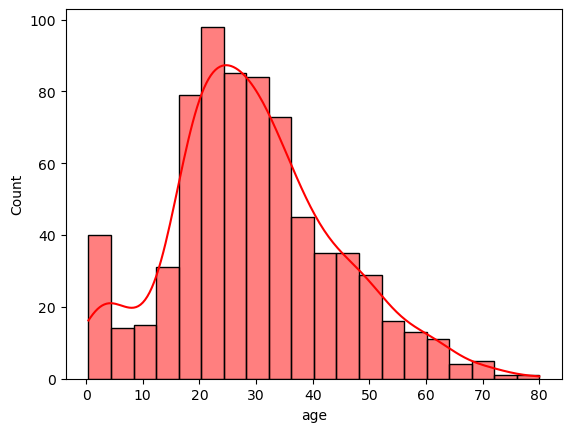

In [17]:
sns.histplot(original_data['age'],kde=True,label = 'original_data',color ='red')

In [18]:
imp_zero = data1[selected_columns].copy()
imp_zero['age'].fillna(0,inplace=True)

<Axes: xlabel='age', ylabel='Count'>

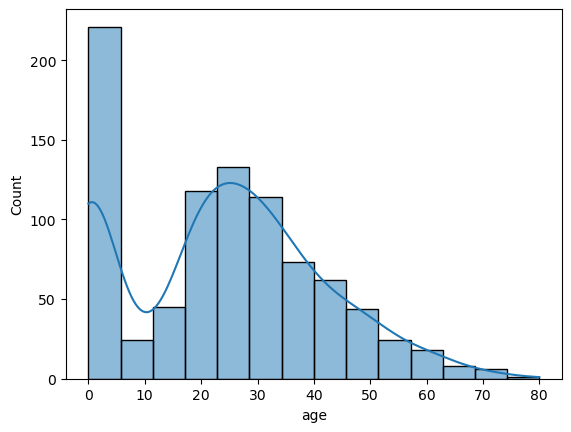

In [19]:
sns.histplot(imp_zero['age'],kde=True)

### Imputing missing value with mean

In [20]:
imp_mean= data1[selected_columns].copy()

mean_age = imp_mean['age'].mean()

# Impute missing values in the 'age' column with the mean
imp_mean.loc[:, 'age_imputed_mean']=imp_mean['age'].fillna(mean_age)

<Axes: xlabel='age_imputed_mean', ylabel='Count'>

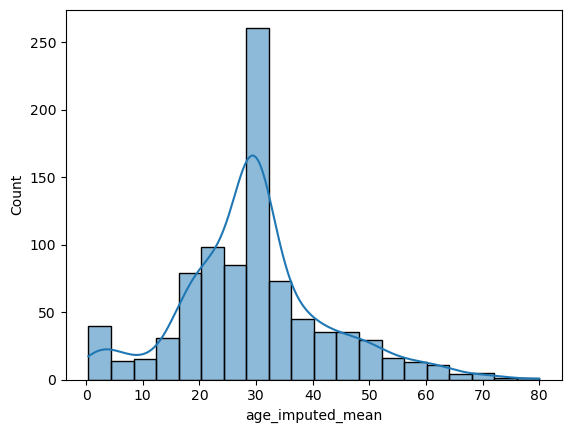

In [21]:
sns.histplot(imp_mean['age_imputed_mean'],bins=20,kde=True)

### Imputing missing value with median

In [22]:
imp_median = data1[selected_columns].copy()
median_age = imp_median['age'].median()

# Impute missing values in the 'age' column with the median
imp_median.loc[:, 'age_imputed_median']= imp_median['age'].fillna(median_age)

<Axes: xlabel='age_imputed_median', ylabel='Count'>

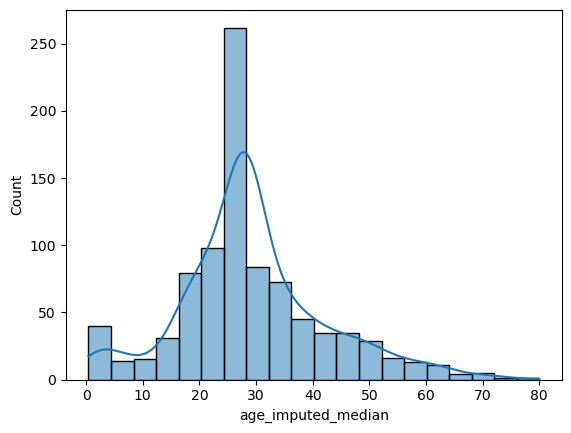

In [23]:
sns.histplot(imp_median['age_imputed_median'],bins=20,kde=True)

### Imputing missing value with Forward Fill (ffill)

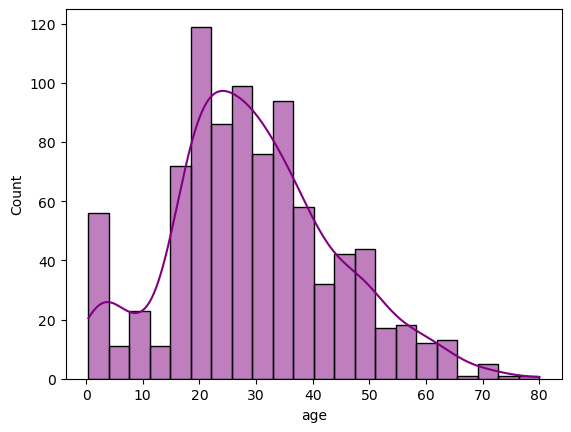

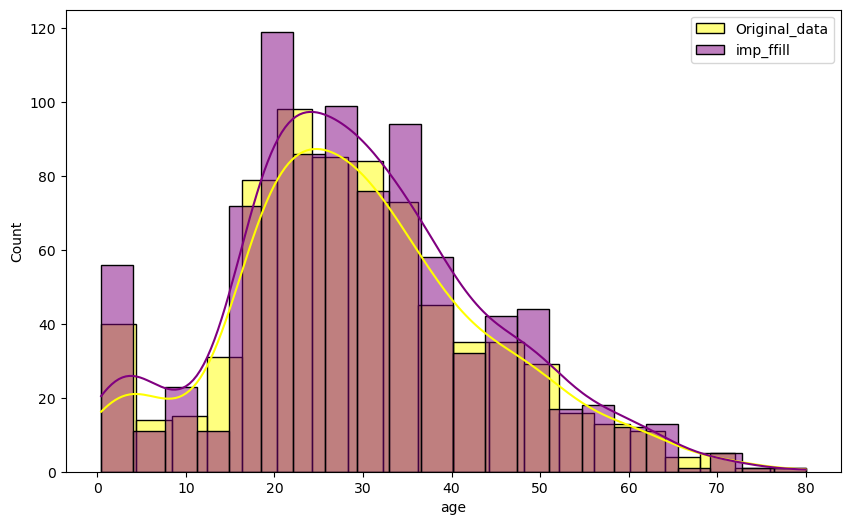

In [24]:
imp_ffill = data1.copy()
imp_ffill['age']=data1['age'].fillna(method='ffill')
sns.histplot(imp_ffill,x= 'age',kde =True,color ='purple')
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=data1, x='age', kde=True, ax=ax, label='Original_data',color = 'yellow')
sns.histplot(data=imp_ffill, x='age', kde=True, ax=ax, label='imp_ffill',color = 'purple')
ax.legend()
plt.show()

### Imputing missing values with backward fill (bfill)

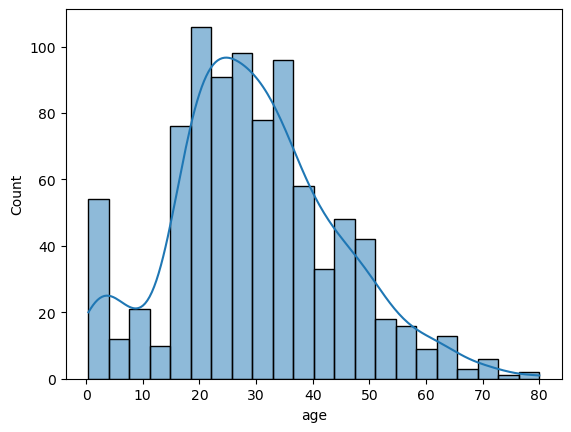

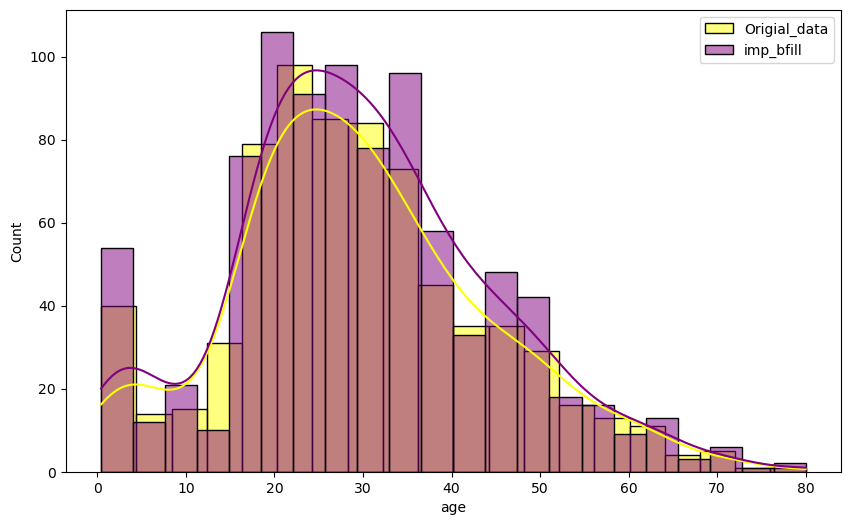

In [25]:
imp_bfill = data1.copy()
imp_bfill['age']=data1['age'].fillna(method='bfill')
sns.histplot(imp_bfill,x= 'age',kde =True)

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=data1, x='age', kde=True, ax=ax, label='Origial_data',color = 'yellow')
sns.histplot(data=imp_bfill, x='age', kde=True, ax=ax, label='imp_bfill',color = 'purple')
ax.legend()
plt.show()

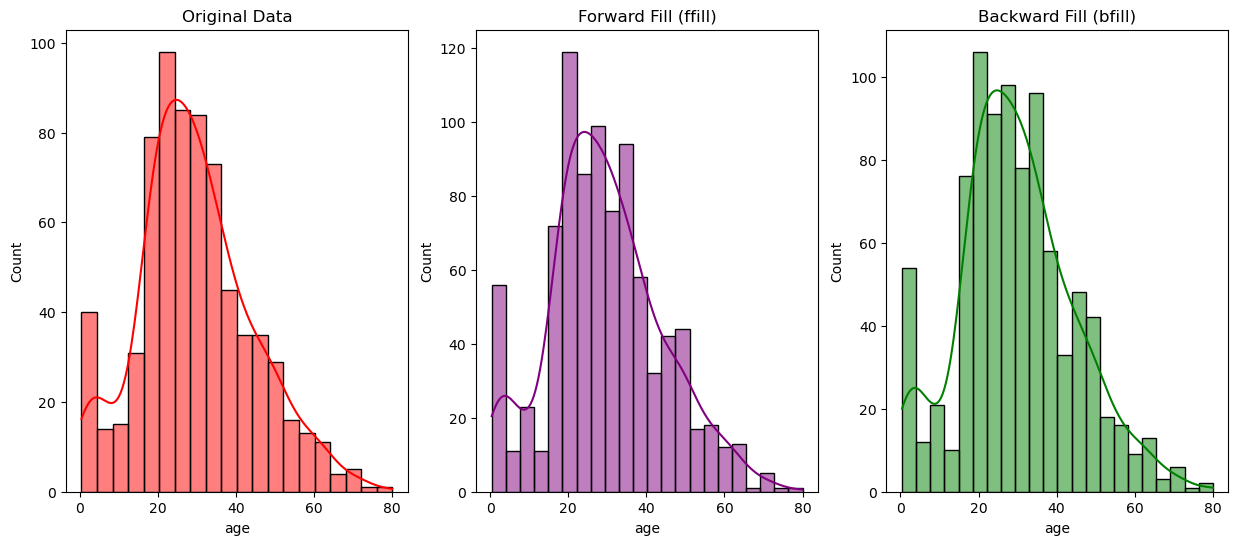

In [26]:
# Original plot
plt.figure(figsize=(15, 6)) #(width,height)

# Plot original data
plt.subplot(1, 3, 1)
sns.histplot(data=data1, x='age', kde=True, color='red')
plt.title('Original Data')

# Plot ffill data
plt.subplot(1, 3, 2)
sns.histplot(data=imp_ffill, x='age', kde=True, color='purple')
plt.title('Forward Fill (ffill)')

# Plot bfill data
plt.subplot(1, 3, 3)
sns.histplot(data=imp_bfill, x='age', kde=True, color='green')
plt.title('Backward Fill (bfill)')

plt.show()

In [29]:
original_data['age_interpolated'] = original_data['age'].interpolate(method='linear')

# Display the original and interpolated data
print("Original Data:")
print(original_data[['age']])
print("\nInterpolated Data:")
print(original_data[['age_interpolated']])

Original Data:
      age
0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
..    ...
886  27.0
887  19.0
888   NaN
889  26.0
890  32.0

[891 rows x 1 columns]

Interpolated Data:
     age_interpolated
0                22.0
1                38.0
2                26.0
3                35.0
4                35.0
..                ...
886              27.0
887              19.0
888              22.5
889              26.0
890              32.0

[891 rows x 1 columns]


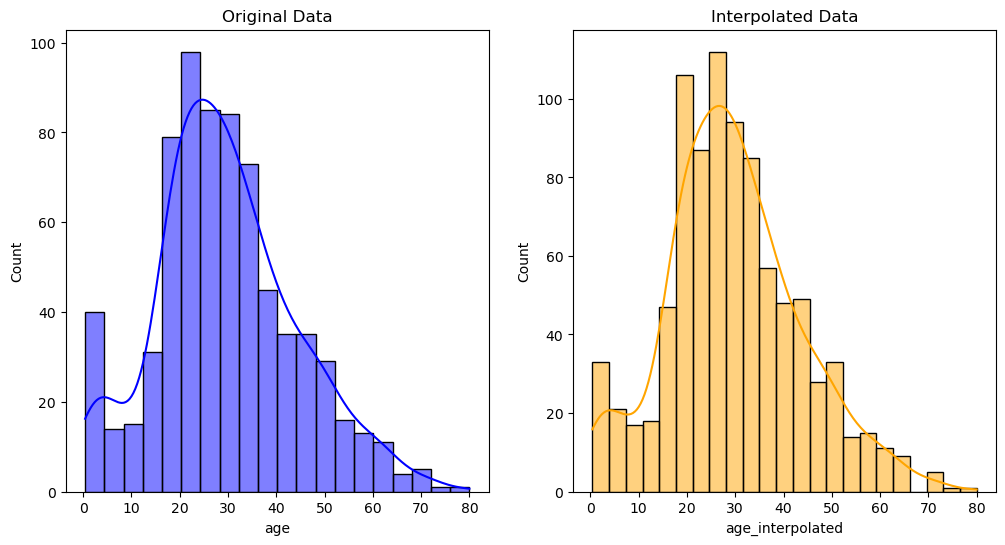

In [31]:
plt.figure(figsize=(12, 6))

# Original data histogram
plt.subplot(1, 2, 1)
sns.histplot(data=original_data, x='age', kde=True, color='blue')
plt.title('Original Data')

# Interpolated data histogram
plt.subplot(1, 2, 2)
sns.histplot(data=original_data, x='age_interpolated', kde=True, color='orange')
plt.title('Interpolated Data')
plt.show()

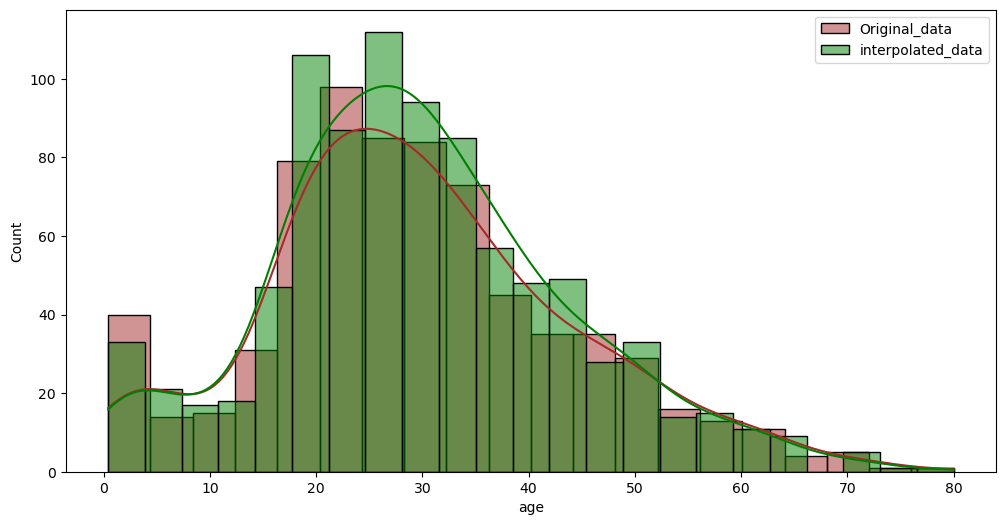

In [32]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=original_data, x='age', kde=True, color='brown',ax=ax,label = 'Original_data')
sns.histplot(data=original_data, x='age_interpolated', kde=True, color='green',ax=ax,label='interpolated_data')
ax.legend()
plt.show()

### Survived (Categorical):
##### Plots:
        * Bar chart: To show the distribution of survival.
        * Pie chart: To visualize the proportion of survivors and non-survivors.

Text(0, 0.5, 'Count')

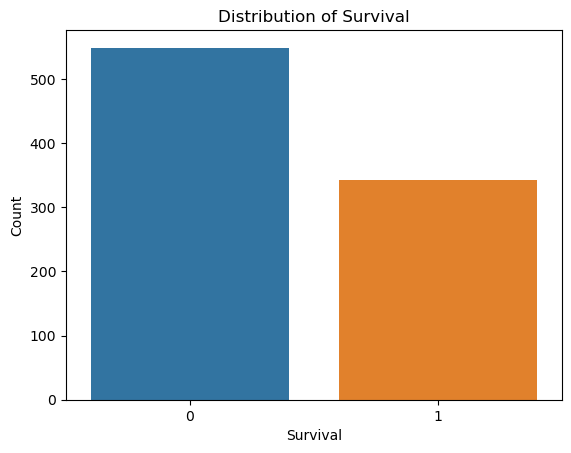

In [33]:
# Bar chart 
sns.countplot(x='survived', data=original_data)
plt.title('Distribution of Survival')
plt.xlabel('Survival')
plt.ylabel('Count')

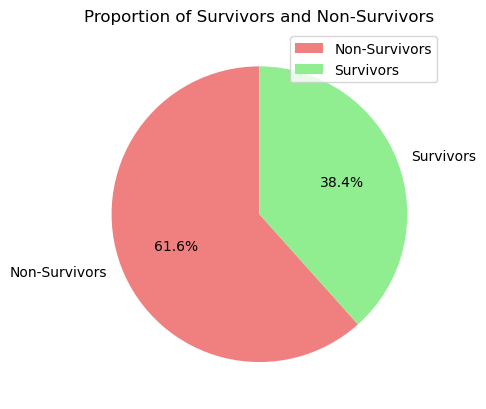

In [35]:
survived_counts = original_data['survived'].value_counts()

# Pie chart with a legend
plt.pie(survived_counts, labels=['Non-Survivors', 'Survivors'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Proportion of Survivors and Non-Survivors')
plt.legend()
plt.show()

### Pclass (Categorical):

   ##### Plots:
       * Bar chart: To display the distribution of passenger class.

Text(0, 0.5, 'Count')

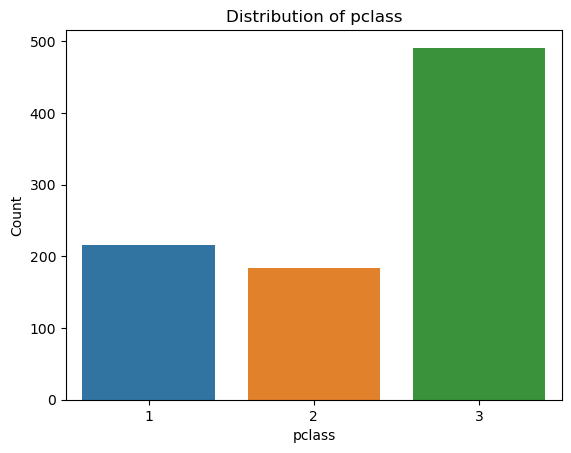

In [36]:
sns.countplot(x='pclass', data=original_data)
plt.title('Distribution of pclass')
plt.xlabel('pclass')
plt.ylabel('Count')

### Sex (Categorical):

##### Plots:
Bar chart: To show the distribution of genders.

Text(0, 0.5, 'Count')

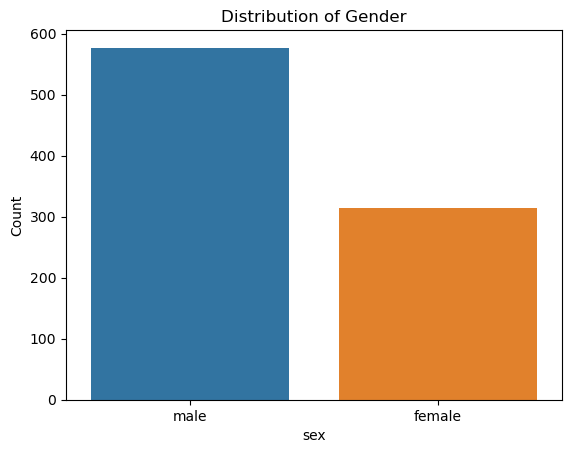

In [37]:
sns.countplot(x='sex', data=original_data)
plt.title('Distribution of Gender')
plt.xlabel('sex')
plt.ylabel('Count')

### Age (Numeric):

  ##### Plots:
    * Histogram: To visualize the distribution of age.
    * Box plot: To identify outliers and understand the central tendency.

Text(0, 0.5, 'Frequency')

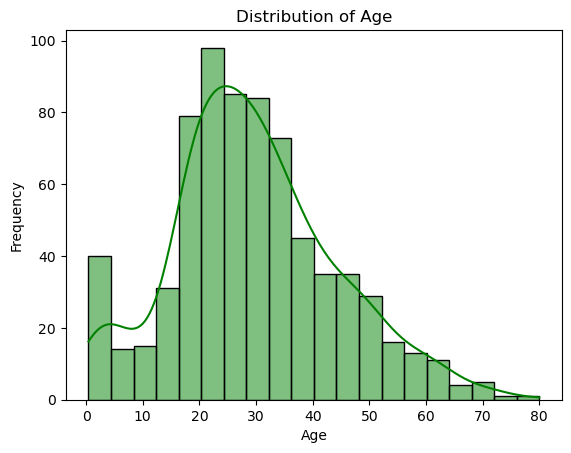

In [40]:
sns.histplot(original_data['age'].dropna(), kde=True, color='green')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

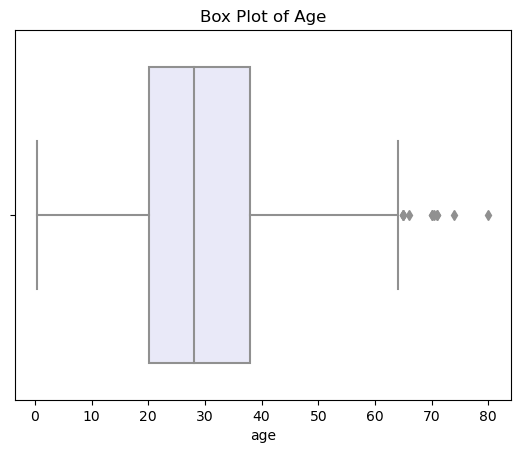

In [49]:
sns.boxplot(x='age', data=original_data, color='lavender')
plt.title('Box Plot of Age')
plt.show()

### Fare (Numeric):

   ##### Plots:
        * Histogram: To visualize the distribution of fare.
        * Box plot: To identify outliers and understand the central tendency.

Text(0, 0.5, 'Frequency')

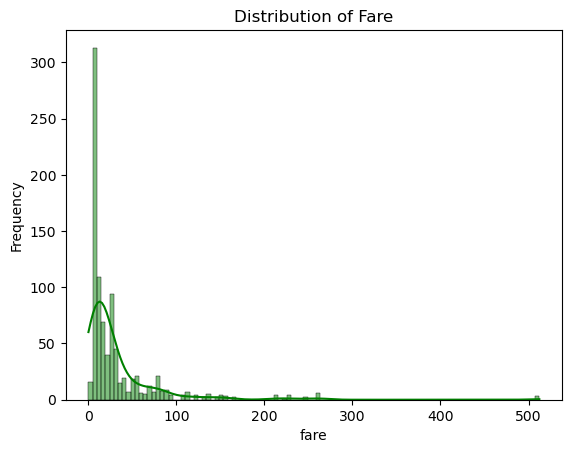

In [43]:
sns.histplot(original_data['fare'].dropna(), kde=True, color='green')
plt.title('Distribution of Fare')
plt.xlabel('fare')
plt.ylabel('Frequency')

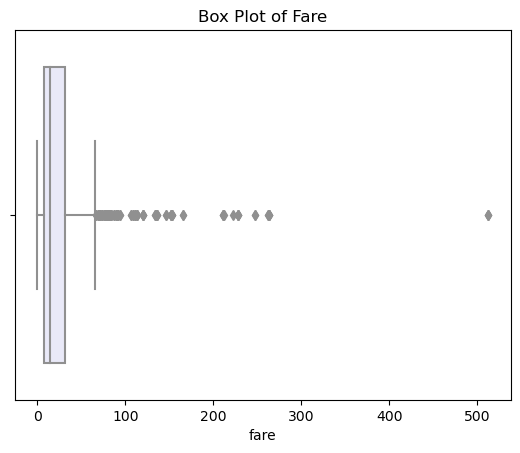

In [44]:
sns.boxplot(x='fare', data=data1, color='lavender')
plt.title('Box Plot of Fare')
plt.show()

### Embark_town (Categorical):
   #### Plots:
        * Bar chart: To show the distribution of embarkation towns.

Text(0, 0.5, 'Count')

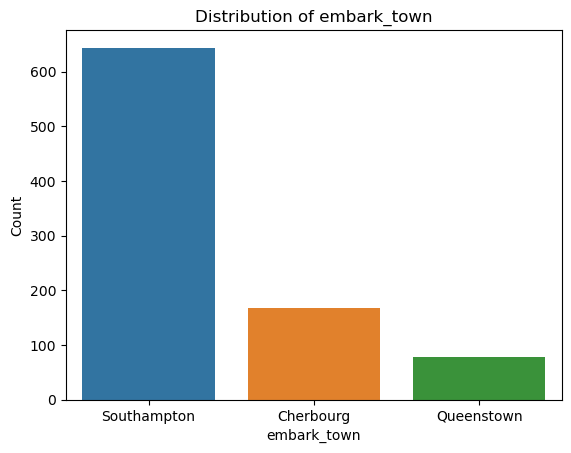

In [45]:
sns.countplot(x='embark_town', data=original_data)
plt.title('Distribution of embark_town')
plt.xlabel('embark_town')
plt.ylabel('Count')

Survived vs. Pclass:

Check how survival is related to passenger class.

Use a stacked bar chart or a clustered bar chart.

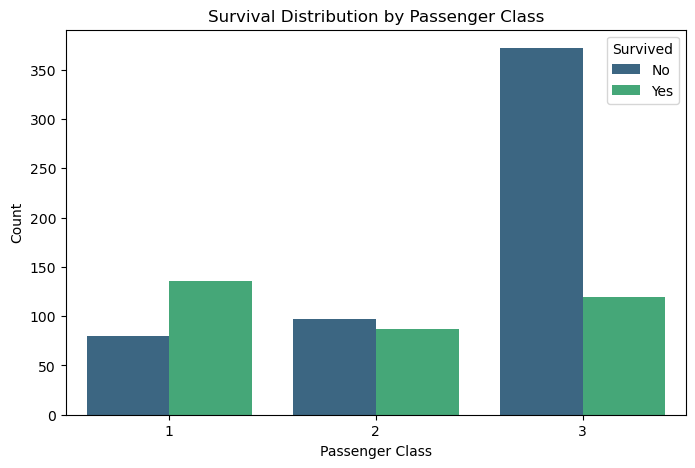

In [47]:
# Create a stacked bar chart for Survived vs. Pclass
plt.figure(figsize=(8, 5))
sns.countplot(x='pclass', hue='survived', data=original_data, palette='viridis')  # 'viridis' is a colormap for colors

# Add labels and title
plt.title('Survival Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()

* The heights of the 'Yes' segments indicate the count of passengers who survived within each passenger class.
* The heights of the 'No' segments indicate the count of passengers who did not survive within each passenger class.
* 'Yes' segment is higher than the 'No' segment in the 1st class bar, it suggests that a higher number of passengers in the 1st class survived.
* 'No' segment is higher than the 'Yes' segment in the 2nd class bar, it suggests that a lower number of passengers in the 2nd class survived.
* there is a huge non-survival count in 3rd class,therefore majority of people died in 3rd class.

Survived vs. Sex:

Investigate the relationship between survival and gender.

Use a grouped bar chart or a mosaic plot.

# Mosaic plot ???
### from statsmodels.graphics.mosaicplot import mosaic

In [ ]:
#from statsmodels.graphics.mosaicplot import mosaic

#plt.figure(figsize=(8, 6))
#mosaic(data1, ['sex', 'survived'], title='Mosaic Plot: Survived vs. sex', axes_label=True)



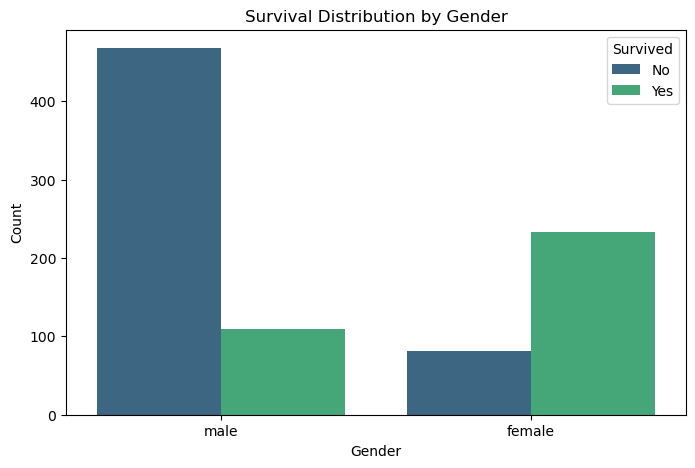

In [48]:
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', hue='survived', data=original_data, palette='viridis')  # 'viridis' is a colormap for colors

# Add labels and title
plt.title('Survival Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()

* There is a huge non-survival count in male 